# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from PIL import Image
import pandas as pd

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

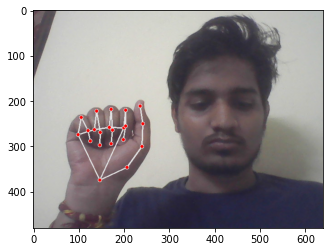

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [7]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 4. Setup Folders for Collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
#actions = np.array(['accident', 'ambulance', 'breathe','emergency', 'fire', 'help'])
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Danger','Wish','Wait','Thief'])
#actions = np.array(['P'])
#actions = np.array(['Thief'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [17]:
cap = cv2.VideoCapture(0)
i=0
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                #keypoints=Image.fromarray(keypoints)
                """if(i==0):
                    a=pd.DataFrame(keypoints)
                    c=a.transpose()
                    a=c
                    i=1
                    
                else:
                    b=pd.DataFrame(keypoints)
                    c=b.transpose()
                    a=a.append(c)"""
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [75]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'Danger': 26,
 'Wish': 27,
 'Wait': 28,
 'Thief': 29}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [59]:
np.array(sequences).shape

(900, 30, 126)

In [60]:
np.array(labels).shape

(900,)

In [61]:
X = np.array(sequences)

In [62]:
X.shape

(900, 30, 126)

In [63]:
y = to_categorical(labels).astype(int)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [65]:
y_test.shape

(45, 30)

# 7. Build and Train LSTM Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Danger','Wish','Wait','Thief'])

In [25]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [11]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [79]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [80]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
27/27 [==============================] - 11s 308ms/step - loss: 3.3706 - categorical_accuracy: 0.0433
Epoch 2/500
27/27 [==============================] - 11s 388ms/step - loss: 3.3233 - categorical_accuracy: 0.0889
Epoch 3/500
27/27 [==============================] - 9s 345ms/step - loss: 3.1458 - categorical_accuracy: 0.1041
Epoch 4/500
27/27 [==============================] - 9s 343ms/step - loss: 3.0575 - categorical_accuracy: 0.1345
Epoch 5/500
27/27 [==============================] - 12s 434ms/step - loss: 2.9031 - categorical_accuracy: 0.1193
Epoch 6/500
27/27 [==============================] - 12s 443ms/step - loss: 2.7338 - categorical_accuracy: 0.1392
Epoch 7/500
27/27 [==============================] - 10s 352ms/step - loss: 2.6410 - categorical_accuracy: 0.1497
Epoch 8/500
27/27 [==============================] - 9s 352ms/step - loss: 2.9353 - categorical_accuracy: 0.1006
Epoch 9/500
27/27 [==============================] - 9s 345ms/step - loss: 2.6484 - categor

27/27 [==============================] - 10s 355ms/step - loss: 0.2432 - categorical_accuracy: 0.9064
Epoch 144/500
27/27 [==============================] - 10s 379ms/step - loss: 0.3185 - categorical_accuracy: 0.8725
Epoch 145/500
27/27 [==============================] - 9s 324ms/step - loss: 0.3096 - categorical_accuracy: 0.8830
Epoch 146/500
27/27 [==============================] - 9s 351ms/step - loss: 0.1401 - categorical_accuracy: 0.9544
Epoch 147/500
27/27 [==============================] - 12s 454ms/step - loss: 0.2707 - categorical_accuracy: 0.8959
Epoch 148/500
27/27 [==============================] - 10s 352ms/step - loss: 0.3557 - categorical_accuracy: 0.8690
Epoch 149/500
27/27 [==============================] - 13s 468ms/step - loss: 0.2807 - categorical_accuracy: 0.8877
Epoch 150/500
27/27 [==============================] - 9s 347ms/step - loss: 0.5443 - categorical_accuracy: 0.8082
Epoch 151/500
27/27 [==============================] - 10s 379ms/step - loss: 0.2351 - ca

27/27 [==============================] - 10s 384ms/step - loss: 2.0054 - categorical_accuracy: 0.3064
Epoch 215/500
27/27 [==============================] - 11s 413ms/step - loss: 1.7735 - categorical_accuracy: 0.3579
Epoch 216/500
27/27 [==============================] - 9s 345ms/step - loss: 1.5614 - categorical_accuracy: 0.4269
Epoch 217/500
27/27 [==============================] - 9s 328ms/step - loss: 1.3224 - categorical_accuracy: 0.5111
Epoch 218/500
27/27 [==============================] - 9s 324ms/step - loss: 1.1831 - categorical_accuracy: 0.5731
Epoch 219/500
27/27 [==============================] - 10s 386ms/step - loss: 1.0036 - categorical_accuracy: 0.6269
Epoch 220/500
27/27 [==============================] - 10s 372ms/step - loss: 1.0001 - categorical_accuracy: 0.6561
Epoch 221/500
27/27 [==============================] - 10s 373ms/step - loss: 0.8801 - categorical_accuracy: 0.6643
Epoch 222/500
27/27 [==============================] - 9s 346ms/step - loss: 0.8439 - cat

KeyboardInterrupt: 

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_9 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_10 (LSTM)              (None, 30, 256)           394240    
                                                                 
 lstm_11 (LSTM)              (None, 512)               1574912   
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 30)               

# 8. Make Predictions

In [82]:
res = model.predict(X_test)

In [83]:
actions[np.argmax(res[0])]

'Thief'

In [84]:
actions[np.argmax(y_test[0])]

'Thief'

# 9. Save Weights

In [85]:
model.save('Sign_Language1.h5')

In [86]:
del model

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
model.load_weights('Sign_Language1.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [29]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [95]:
yhat = model.predict(X_test)

In [96]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [97]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[42,  1],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[40,  0],
        [ 1,  4]],

       [[44,  1],
        [ 0,  0]],

       [[42,  0],
        [ 2,  1]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[42,  0],
        [ 1,  2]],

       [[43,  2],
        [ 0,  0]],

       [[42,  1],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[44,  1],
        [ 0,  0]],

       [[42,  0],
        [ 0,  3]],

       [[42,  1],
        [ 1,  1]],

       [[42,  1],
        [ 1,  1]],

       [[44,  0],
        [ 1,  0]],

       [[42,  1],
        [ 2,  0]],

       [[42,  0],
        [ 0,  3]],

       [[40,  1],
        [ 1,  3]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]]], dtype=int64)

In [98]:
accuracy_score(ytrue, yhat)

0.7777777777777778

# 11. Test in Real Time

In [30]:
from scipy import stats

In [12]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(255,140,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [32]:
len(actions)

30

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [14]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thief
<class 'mediapipe.python.solution_ba

In [81]:
cap.release()
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from PIL import Image
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import load_model

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [22]:
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         #cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         #cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame

In [13]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0),(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(255,140,0)]

In [14]:
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Danger','Wish','Wait','Thief'])

In [15]:
label_map = {label:num for num, label in enumerate(actions)}

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [17]:
model.load_weights('Sign_Language1.h5')

In [23]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
N
<class 'mediapipe.python.solution_base.SolutionOutputs'>
N
<class 'mediapipe.python.solution_base.SolutionOutputs'>
M
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>

A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
A
<class 'mediapipe.python.solution_base.SolutionOutputs